# imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import torch

# numpy, torch

`-` torch.tensor() = np.array()

In [ ]:
np.array([1,2,3]), torch.tensor([1,2,3])

(array([1, 2, 3]), tensor([1, 2, 3]))

`-` 소수점의 정밀도에서 차이가 있음 (torch가 조금 쪼잔)

In [ ]:
np.array([3.123456789]), torch.tensor([3.123456789])

(array([3.12345679]), tensor([3.1235]))

`-` 기본적인 `numpy`문법은 `np`대신에 `torch`를 써도 무방 $\to$ 완전히 같지는 않음

In [ ]:
np.arange(10), torch.arange(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
np.linspace(0,1,10), torch.linspace(0,1,10)

(array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
         1.0000]))

In [ ]:
np.random.randn(10)

array([-1.25129098e+00,  1.92125061e-01, -1.82716363e+00, -1.37293516e+00,
        1.38834103e+00, -1.76753229e+00, -1.02414400e+00, -5.02814204e-01,
        1.68938944e-01,  1.01113642e-03])

In [ ]:
torch.randn(10)

tensor([ 0.9400,  0.6244,  1.7138,  0.7075,  0.2483, -2.4638, -1.3615, -0.5378,
        -1.1571,  0.2088])

## 벡터 생성법

`-` 길이가 3인 벡터 선언방법

In [ ]:
a = torch.tensor([1,2,3])
a.shape

torch.Size([3])

`-` `3 x 1` col vec 선언방법

In [ ]:
a = torch.tensor([[1],[1],[1]])
a.shape

torch.Size([3, 1])

`-` `1x 3` row vec 선언방법

In [ ]:
a = torch.tensor([[1,2,3]])
a.shape

torch.Size([1, 3])

## torch의 dtype

`-` default $\to$ dtype = torch.float32

In [ ]:
tsr = torch.tensor([1.23,2.34])
tsr.dtype

torch.float32

`-` 정수로 선언하더라도 dtype을 torch.float32로 바꾸는게 유리하다.

(안 좋은 선언예시)

In [ ]:
tsr = torch.tensor([1,2])
tsr.dtype

torch.int64

(좋은 선언예시1)

In [ ]:
tsr = torch.tensor([1,2],dtype = torch.float32)
tsr.dtype

torch.float32

(좋은 선언예시2)

In [ ]:
tsr = torch.tensor([1,2.0])
tsr.dtype

torch.float32

(사실 int로 선언해도 나중에 float로 바꿔주면 큰 문제가 없음)

In [ ]:
tsr = torch.tensor([1,2]).float()
tsr.dtype

torch.float32

`-` torch.float32로 바꾸는게 유리한 이유 $\to$ torch.tensor 끼리의 연산에서 문제가 될 수 있음.

(별 문제가 없는 경우)

In [ ]:
torch.tensor([1,2])-torch.tensor([1.0,2.0]) 

tensor([0., 0.])

(에러 1)

In [ ]:
torch.tensor([[1.0,0.0],[0.0,1.0]]) @ torch.tensor([[1],[2]])

RuntimeError: ignored

(에러 2)

In [ ]:
torch.tensor([[1,0],[0,1]]) @ torch.tensor([[1.0],[2.0]])

RuntimeError: ignored

(해결 1) 둘다 정수로 통일

In [ ]:
torch.tensor([[1,0],[0,1]]) @ torch.tensor([[1],[2]])

tensor([[1],
        [2]])

(해결 2) 둘다 소수로 통일 $\to$ 더 좋은 방법

In [ ]:
torch.tensor([[1.0,0.0],[0.0,1.0]]) @ torch.tensor([[1.0],[2.0]])

tensor([[1.],
        [2.]])

## shape of vector

In [ ]:
A = torch.tensor([[2.00,0.00],[0.00,3.00]])
b1 = torch.tensor([[-1.0, -5.0]])
b2 = torch.tensor([[-1.0], [-5.0]])
b3 = torch.tensor([-1.0, -5.0])

In [ ]:
A.shape

torch.Size([2, 2])

In [ ]:
b1.shape, b2.shape, b3.shape

(torch.Size([1, 2]), torch.Size([2, 1]), torch.Size([2]))

`-` 브로드캐스팅

In [ ]:
a = torch.tensor([1,2,3])
a -1

tensor([0, 1, 2])

In [ ]:
b = torch.tensor([[1],[2],[3]])
b-1

tensor([[0],
        [1],
        [2]])

In [ ]:
b.shape, a.shape

(torch.Size([3, 1]), torch.Size([3]))

(a는 그냥 길이가 3인 벡터이지만 연산시, a를 row-vec으로 해석)

$ a= [1, 2, 3], \quad b= \begin{bmatrix} 1 \\ 2 \\ 3  \end{bmatrix} \quad \to  \quad a = \begin{bmatrix} 1 & 2 & 3 \\ 1 & 2 & 3 \\ 1 & 2 & 3  \end{bmatrix}, \quad b = \begin{bmatrix} 1 & 1 & 1 \\ 2 & 2 & 2 \\ 3 & 3 & 3  \end{bmatrix}  $

In [ ]:
a-b

tensor([[ 0,  1,  2],
        [-1,  0,  1],
        [-2, -1,  0]])

In [ ]:
(a-b).shape

torch.Size([3, 3])

# Review

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/II.%20DNN/2022-09-22-regression.csv") 
df.head()

,x,y
0,-2.482113,-8.542024
1,-2.362146,-6.576713
2,-1.997295,-5.949576
3,-1.623936,-4.479364
4,-1.479192,-4.251570


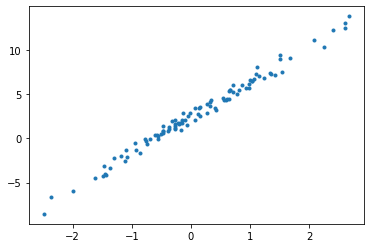

In [ ]:
plt.plot(df.x,df.y,".")

In [ ]:
x = torch.tensor(df.x).float().reshape(100,1) ### 메모리 절약을 위해 float32를 사용
y = torch.tensor(df.y).float().reshape(100,1)
_1 = torch.ones([100,1])
X = torch.concat([_1,x],axis=1)

In [ ]:
X.shape

torch.Size([100, 2])

In [ ]:
What= torch.tensor([[-5.0],[10.0]],requires_grad = True)
What

tensor([[-5.],
        [10.]], requires_grad=True)

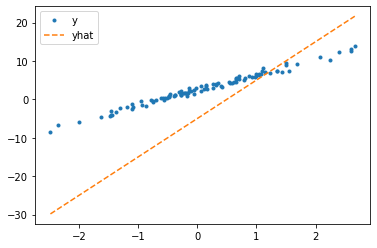

In [ ]:
plt.plot(x,y,".")
plt.plot(x,(X@What).data,"--")
plt.legend(["y","yhat"])

## loss = SSE

In [ ]:
What= torch.tensor([[-5.0],[10.0]],requires_grad = True)
What

tensor([[-5.],
        [10.]], requires_grad=True)

In [ ]:
for epoc in range(30) : 
    yhat = X@What
    loss = torch.sum((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.001*What.grad ## 갱신한 가중치 저장
    What.grad = None

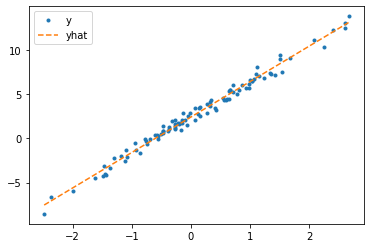

In [ ]:
plt.plot(x,y,".")
plt.plot(x,(X@What).data,"--")
plt.legend(["y","yhat"])

### SSE의 다른버전 = MSE

In [ ]:
What= torch.tensor([[-5.0],[10.0]],requires_grad = True)
What

tensor([[-5.],
        [10.]], requires_grad=True)

In [ ]:
for epoc in range(30) : 
    yhat = X@What
    loss = torch.mean((y-yhat)**2)
    loss.backward()
    What.data = What.data - 0.1*What.grad ## 갱신한 가중치 저장
    What.grad = None

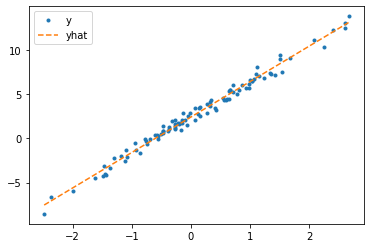

In [ ]:
plt.plot(x,y,".")
plt.plot(x,(X@What).data,"--")
plt.legend(["y","yhat"])

# step1의 다른 버전 - net설계만

## ver1 : 벡터형

`-` parameter

* in_features : 입력차원

* out_features : 출력차원

* bias : 절편유무

In [ ]:
torch.manual_seed(202150256)
net = torch.nn.Linear(in_features=1,out_features=1,bias=True)

* `net`이 만들어질 때 최초 가중치 값이 설정된다.

In [ ]:
net.bias, net.weight

(Parameter containing:
 tensor([-0.0483], requires_grad=True), Parameter containing:
 tensor([[-0.8675]], requires_grad=True))

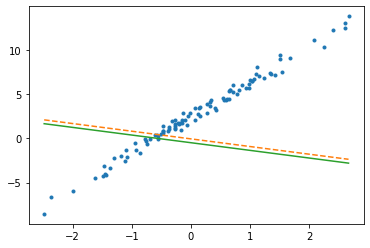

In [ ]:
plt.plot(x,y,".")
plt.plot(x,net(x).data,"--")
plt.plot(x,-0.483-0.8675*x,"-")

`-` 데이터로드

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2022/main/posts/II.%20DNN/2022-09-22-regression.csv") 

In [74]:
x = torch.tensor(df.x).float()
y = torch.tensor(df.y).float()

## ver2  : 매트릭스

In [76]:
yhat = net(X)

In [79]:
torch.manual_seed(202150256)
net = torch.nn.Linear(in_features=2, out_features=1,bias=False)

In [80]:
net.weight

Parameter containing:
tensor([[-0.6134, -0.0341]], requires_grad=True)

$w_0 = -0.6134, w_1 =-0.0341$

In [86]:
X.shape

torch.Size([100, 2])

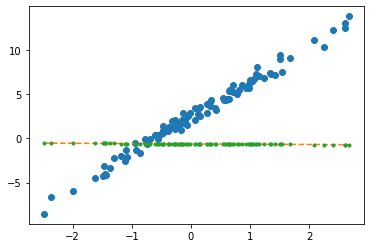

In [91]:
plt.plot(x,y,"o")
plt.plot(x,net(X).data,"--")
plt.plot(x,X@torch.tensor([[-0.6134], [-0.0341]]),".")

`-` 수식표현 : $\bf {\hat y} = \bf{X\hat W} = \begin{bmatrix} 1 & x_1 \\
1 & x_2 \\ \dots & \dots \\ 1 & x_{100}  \end{bmatrix} \times \begin{bmatrix} \hat{w_0} \\ \hat {w_1}\end{bmatrix}$

* 위 표현을 하는게 `net`의 역할

(잘못된 사용1)

* 컬럼벡터로 명시하지 않은 경우, 즉 단순히 길이가 100인 벡터를 선언

In [98]:
x = x.reshape(100,1)
_x = x.reshape(-1)
y = y.reshape(100,1)
_y = y.reshape(-1)

In [101]:
net = torch.nn.Linear(in_features= 1, out_features=1, bias=True)

In [102]:
net(_x)

RuntimeError: ignored

(잘못된 사용2)

* `bias = False` 생략

`-` 수식표현 : $\bf {\hat y} = \bf{X\hat W} = \begin{bmatrix} 1 & x_1 \\
1 & x_2 \\ \dots & \dots \\ 1 & x_{100}  \end{bmatrix} \times \begin{bmatrix} \hat{w_0} \\ \hat {w_1}\end{bmatrix} + c$

In [103]:
torch.manual_seed(202150256)
net = torch.nn.Linear(in_features= 2, out_features=1) ##bias=False를 깜빡

In [104]:
net.weight

Parameter containing:
tensor([[-0.6134, -0.0341]], requires_grad=True)

In [105]:
net.bias

Parameter containing:
tensor([0.6102], requires_grad=True)

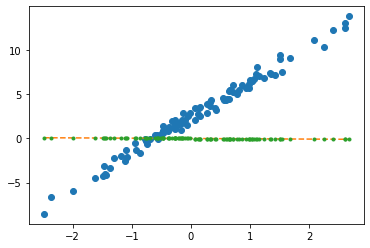

In [106]:
plt.plot(x,y,"o")
plt.plot(x,net(X).data,"--")
plt.plot(x,X@torch.tensor([[-0.6134], [-0.0341]])+0.6102,".")

# step1~3

## ver1

`-` 네트워크 준비

In [111]:
net = torch.nn.Linear(1, 1)
net.bias.data = torch.tensor([-5.0])
net.weight.data = torch.tensor([[-10.0]])
net.bias,net.weight

(Parameter containing:
 tensor([-5.], requires_grad=True), Parameter containing:
 tensor([[-10.]], requires_grad=True))

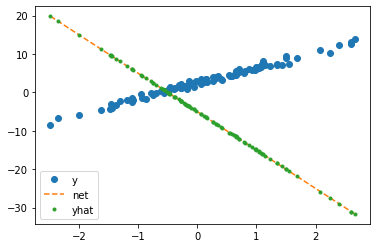

In [117]:
plt.plot(x,y,"o")
plt.plot(x,net(x).data,"--")
plt.plot(x,-5-10*x,".")
plt.legend(["y","net","yhat"])

`-` step1 : $\hat {y}$를 구하는 과정

In [123]:
yhat = net(x)

`-` step2 : $loss$ 계산

In [124]:
loss = torch.mean((y-yhat)**2)
loss

tensor(305.5515, grad_fn=<MeanBackward0>)

`-` step3

(미분전)

In [125]:
net.weight,net.bias

(Parameter containing:
 tensor([[-10.]], requires_grad=True), Parameter containing:
 tensor([-5.], requires_grad=True))

In [126]:
net.bias.grad, net.weight.grad

(None, None)

(미분후)

In [127]:
loss.backward()

In [129]:
net.bias.grad, net.weight.grad

(tensor([-18.3235]), tensor([[-33.8568]]))

`-` step4

(업데이트 전)

In [130]:
net.weight, net.bias

(Parameter containing:
 tensor([[-10.]], requires_grad=True), Parameter containing:
 tensor([-5.], requires_grad=True))

In [131]:
net.bias.grad, net.weight.grad

(tensor([-18.3235]), tensor([[-33.8568]]))

(업데이트)

In [132]:
net.bias.data = net.bias.data - 0.1 * net.bias.grad
net.weight.data = net.weight.data - 0.1 * net.weight.grad

In [133]:
net.bias.grad = None
net.weight.grad = None

(업데이트 후)

In [134]:
net.bias, net.weight

(Parameter containing:
 tensor([-3.1677], requires_grad=True), Parameter containing:
 tensor([[-6.6143]], requires_grad=True))

In [135]:
net.bias.grad, net.weight.grad

(None, None)

(위 과정을 반복)

In [136]:
for epoc in range(30) :
    ## step1
    yhat = net(x)

    ## step2

    loss = torch.mean((y-yhat)**2)

    ## step3

    loss.backward()

    ## step4

    net.bias.data = net.bias.data - 0.1*net.bias.grad
    net.weight.data = net.weight.data - 0.1*net.weight.grad
    net.bias.grad = None
    net.weight.grad = None

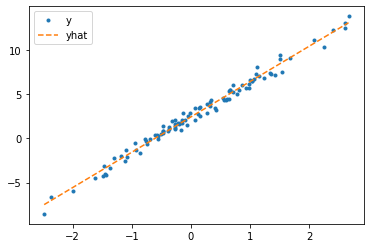

In [138]:
plt.plot(x,y,".")
plt.plot(x,net(x).data,"--")
plt.legend(["y","yhat"])

## ver2

In [139]:
net = torch.nn.Linear(2,1,bias=False)

In [142]:
net.weight

Parameter containing:
tensor([[-0.4208, -0.1402]], requires_grad=True)

In [143]:
net.weight.data = torch.tensor([[-5.0, -10.0]])

In [146]:
for epoc in range(30) : 
    ## step1
    yhat = net(X)
    ## step2
    loss = torch.mean((y-yhat)**2)
    ## step3
    loss.backward()
    ## step4
    net.weight.data = net.weight.data - 0.1*net.weight.grad
    net.weight.grad = None

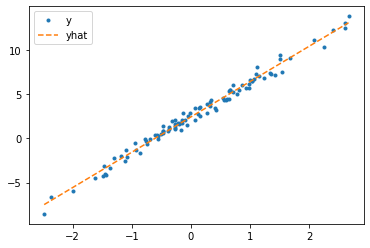

In [148]:
plt.plot(x,y,".")
plt.plot(x,net(X).data,"--")
plt.legend(["y","yhat"])

# step4의 다른버전 : 옵티마이저!

## ver1

In [151]:
net = torch.nn.Linear(1,1) 
net.bias.data = torch.tensor([-5.0])
net.weight.data = torch.tensor([[10.0]])
net.bias,net.weight

(Parameter containing:
 tensor([-5.], requires_grad=True), Parameter containing:
 tensor([[10.]], requires_grad=True))

In [152]:
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)

In [153]:
for epoc in range(30):
    ## step1
    yhat = net(x) 
    ## step2
    loss = torch.mean((y-yhat)**2)
    ## step3 
    loss.backward()
    ## step4 
    optimizr.step()
    optimizr.zero_grad()

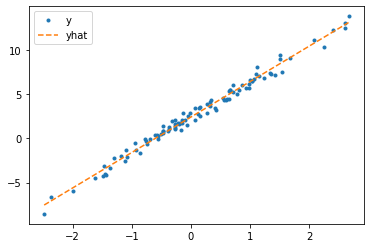

In [155]:
plt.plot(x,y,'.')
plt.plot(x,net(x).data,'--')
plt.legend(["y","yhat"])

## ver2 (가장 중요)

In [157]:
net = torch.nn.Linear(2,1,bias=False)
net.weight.data = torch.tensor([[-5.0, -10.0]])

In [158]:
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)

In [159]:
for epoc in range(30) :
    ## step1
    yhat = net(X)
    ## step2
    loss = torch.mean((y-yhat)**2)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()

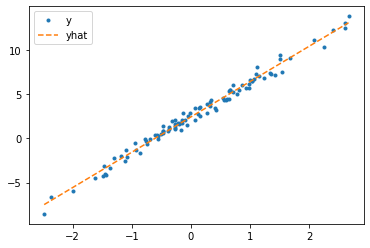

In [160]:
plt.plot(x,y,'.')
plt.plot(x,net(X).data,'--')
plt.legend(["y","yhat"])

# Logistic regression

## motive

`-` $x$가 커질수록(혹은 작아질수록) 성공확률이 증가함.

`-` $(\bf{X},y)= (스펙,합격)$ 

In [163]:
_df = pd.DataFrame({'x':range(-6,7),'y':[0,0,0,0,0,0,1,0,1,1,1,1,1]})
_df 

,x,y
0,-6,0
1,-5,0
2,-4,0
3,-3,0
4,-2,0
5,-1,0
6,0,1
7,1,0
8,2,1
9,3,1


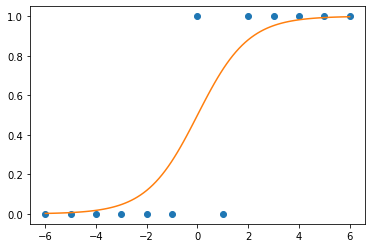

In [166]:
def f(x) :
    return torch.exp(x) / (1+torch.exp(x))

xx = torch.linspace(-6,6,100)
plt.plot(_df.x,_df.y,'o')
plt.plot(xx,f(xx))

## model

* $y_i \sim Ber$, $\pi_i =  \frac{exp(w_0+w_1x_i)}{1+exp(w_0+w_1x_i)} = \frac{1}{1+exp(-(w_0+w_1x_i))}$

*  $\hat{y_i} = \hat {\pi_i} = \frac{1}{1+exp(-(\hat{w_0}+\hat{w_1}x_i))}$

* $loss = -\sum_{i=1}^{n}{(y_i \log(\hat{y_i}) + (1-y_i) \log(1-\hat{y_i}))}$

## toy example

In [167]:
x = torch.linspace(-1, 1, 2000).reshape(2000,1)
w0  = -1
w1 = 5
u = w0+w1*x
v = torch.exp(u) /(1+torch.exp(u))
y = torch.bernoulli(v)

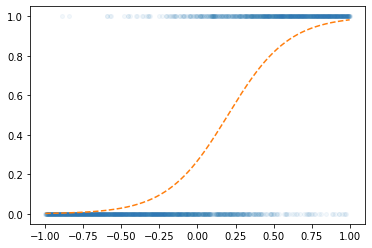

In [168]:
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--')

`-` 최초의 곡선

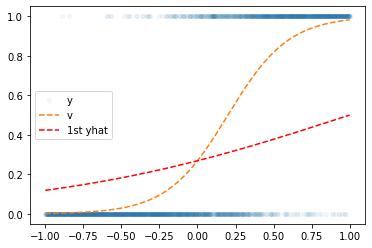

In [176]:
w0hat= -1
w1hat = 1
yhat = f(w0hat+x*w1hat)
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--')
plt.plot(x,yhat,'--r')
plt.legend(["y","v","1st yhat"])

In [180]:
l1=torch.nn.Linear(1,1)
l1.bias.data=torch.tensor([-1.0])
l1.weight.data = torch.tensor([[1.0]])

In [181]:
a1=torch.nn.Sigmoid()

In [182]:
for epoc in range(6000):
    ## step1 
    _yhat = a1(l1(x))
    ## step2 
    loss = torch.mean((y-_yhat)**2) ## loss 를 원래 이렇게 하는건 아니에요.. 
    ## step3 
    loss.backward()
    ## step4 
    l1.bias.data = l1.bias.data - 0.1 * l1.bias.grad 
    l1.weight.data = l1.weight.data - 0.1 * l1.weight.grad 
    l1.bias.grad = None 
    l1.weight.grad = None 

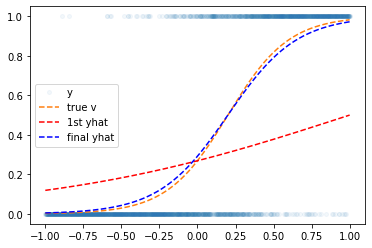

In [185]:
plt.plot(x,y,'o',alpha=0.05,ms=4)
plt.plot(x,v,'--')
plt.plot(x,yhat,'--r')
plt.plot(x,_yhat.data,"--b")
plt.legend(["y","true v","1st yhat","final yhat"])